In [2]:
import numpy as np
# from helpers import get_data
# from constants_v1 import *
# Plotting
import pandas as pd
from helpers_pd import *
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
sns.set()
# plt.style.use('seaborn-white')
import matplotlib.pyplot as plt

In [131]:
gen1x = "Gen10"
# gen2x = "Gen11"
df1 = get_data(gen=gen1x)
# df2 = get_data(gen=gen2x)
df1["Gen"] = gen1x
# df2["Gen"] = gen2x
df = pd.concat([df1, 
#                 df2
               ])
len(df)

2510

In [132]:
# Index names
df['Name'] = df['Gen'] + "/" + df.index
df = df.set_index('Name')

In [133]:
# For later, 'KGE-d13C_out', 'NSE-d13C_out'
dfs = df[['Model', 
#           'Gen',
#           'z3_factor',
#           'cZ0Z1',
#           'cZ',
          'c_adr',
          'k_g',
          'gamma01',
          'gammaZ',
          'f_transp',
          'f_evap',
          'f_oc',
          'k_oc',
          'beta_runoff',
          'dt_50_aged',
          'dt_50_ab',
          'dt_50_ref',
          'epsilon_iso',
          'beta_moisture',
          'KGE-Q_out', 
          'KGE-CONC-blk', 'KGE-d13C-blk',
          'KGE-CONC-tra', 'KGE-d13C-tra',
          'KGE-CONC-det', 'KGE-d13C-det',
#           'KGE-CONC_out', 'KGE-d13C_out',
#           'MAE-CONC_out', 'MAE-d13C_out',
#           'NSE-CONC_out', 'NSE-Q_out',
#           'BIAS-CONC_out', 'BIAS-d13C_out',
#           'BIAS-LDS_out',
#           'BIAS-Q_out'
          ]]

In [134]:
# dfs['KGE-SM'] = (dfs.loc[:, 'KGE-CONC_out'] + dfs.loc[:, 'KGE-CONC-blk'])/2.0  
# dfs['KGE-d13C'] = (dfs.loc[:, 'KGE-d13C_out'] + dfs.loc[:, 'KGE-d13C-blk'])/2.0
dfs['k_d'] = dfs.loc[:, 'k_oc'] * dfs.loc[:,'f_oc']
# dfs['KGE-CONC_out'].max()
# dfs['KGE-CONC-blk'].max()
# dfs['KGE-SM'].max()
# dfs['KGE-d13C_out'].max()
# dfs['NSE-Q_out' ].max()
# dfs['KGE-CONC_out'].max()
# dfs['BIAS-LDS_out'].min()
# dfs['BIAS-d13C_out'].max()

In [135]:
dfs = dfs.loc[(dfs['Model'] == 'var')] 
ff_out = dfs.loc[(dfs['KGE-Q_out'] > 0.545) &(dfs['KGE-CONC-blk'] > .6) & (dfs['KGE-d13C-blk'] > -3)] # Bulk
# ff_out = dfs.loc[(dfs['KGE-Q_out'] > 0.5) &(dfs['KGE-CONC-tra'] > .5) & (dfs['KGE-d13C-tra'] > -3)] # Transects

print(len(ff_out))

117


In [148]:
def LevelIso(row, metric):
    if row[metric] >= 0.8:
        val = "A"
    elif row[metric] >= 0.75:
        val = "B"
    elif row[metric] >= 0.7:
        val = "C"
#     elif row[metric] >= 0.5:
#         val = "D"
    else:
        val = "D"
    return val

In [149]:
ff_out['Iso'] = ff_out.apply(LevelIso, args=('KGE-d13C-blk',), axis=1)
# ff_out['Iso'] = ff_out.apply(LevelIso, args=('KGE-d13C-tra',), axis=1)

In [150]:
ff_iso = ff_out[[
    'Iso',
#     'c_adr',
#     'k_g',
#     'gamma01',
#     'gammaZ',
#     'f_transp',
#     'f_evap',
#     'f_oc',
    'k_oc',
#     'k_d',
#     'beta_runoff',
#     'dt_50_aged',
#     'dt_50_ab',
    'dt_50_ref',
#     'epsilon_iso',
#     'beta_moisture',
]]

ff_iso.head()

,Iso,k_oc,dt_50_ref
Name,,,
Gen10/LHS_be1var61/21/,A,1603.985788,19.626010
Gen10/LHS_be1var61/28/,D,174.440332,14.126053
Gen10/LHS_be1var61/29/,D,1686.064704,15.651204
Gen10/LHS_be1var61/4/,D,1413.351975,12.302103
Gen10/LHS_be1var62/16/,D,1169.321178,18.347296


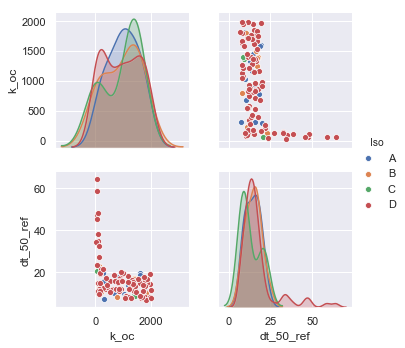

In [151]:
g = sns.pairplot(ff_iso, hue="Iso", hue_order = ["A", 
                                                 "B", 
                                                 "C", 
                                                 "D"
                                                ])

In [127]:
ff_check = ff_iso.loc[(ff_iso['k_oc'] < 1000)] # Soils

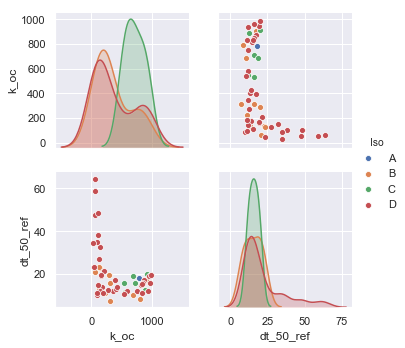

In [129]:
g = sns.pairplot(ff_check, hue="Iso", hue_order = ["A", 
                                                 "B", 
                                                 "C", 
                                                 "D"
                                                ])

In [152]:
ff_iso.head()

,Iso,k_oc,dt_50_ref
Name,,,
Gen10/LHS_be1var61/21/,A,1603.985788,19.626010
Gen10/LHS_be1var61/28/,D,174.440332,14.126053
Gen10/LHS_be1var61/29/,D,1686.064704,15.651204
Gen10/LHS_be1var61/4/,D,1413.351975,12.302103
Gen10/LHS_be1var62/16/,D,1169.321178,18.347296


In [156]:
import scipy.stats  as stats

In [157]:
print("r", 'P')
stats.pearsonr(ff_iso['dt_50_ref'], ff_iso['k_oc'])

('r', 'P')


(-0.4656913035174867, 1.2176786753107526e-07)

10.0